<a href="https://colab.research.google.com/github/AkshayAI007/Topic-modelling-of-news-article-/blob/main/Topic_Modelling_on_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Topic modeling of news article



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual


# **Project Summary -**

The exponential growth of digital content has led to an overwhelming influx of news articles across various domains. Manual categorization and analysis of this vast amount of information are labor-intensive and time-consuming. Unsupervised topic modeling offers a solution by automating the process of identifying key themes within the articles, enabling efficient content organization and information retrieval.**Unsupervised machine learning** techniques have gained significant traction in the field of natural language processing (NLP) due to their ability to extract valuable insights from unstructured text data. This project focuses on applying clustering algorithms, particularly **Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA)**, to perform topic modeling on a diverse collection of news articles. The goal is to uncover hidden thematic structures within the articles and categorize them into coherent topics.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to leverage unsupervised machine learning techniques to perform topic modeling on a collection of news articles from BBC using clustering algorithms such as Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA). The goal is to extract meaningful topics from the articles, allowing for efficient content organization, information retrieval, and trend analysis.The dataset Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:

import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


 1.   For loading the dataset, the **glob and re** libraries were used.While reading the data, each paragraph was read into a different row with the column index being the title.

 2. This data was organised into three features - the first column named "Title", the rest of the article in "Description" and the category assigned to the article in "Category" column
 1.   Articles from each category were stored in separate DataFrames (for any furture usage), and all were concatenated to form a single final DataFrame






In [22]:

# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/Projects/Topic_Modeling_on_news_articles/bbc/bbc'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()

# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):

    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']

      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')

      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass

### Dataset Loading

In [23]:
bbc.shape

(2224, 3)

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. There are over 2000 news article available in these categories.**

In [24]:
bbc.sample(10)


,Filename,Contents,Category
1221,050,scots smoking ban details set out smoke-free ...,politics
1437,385,lions blow to world cup stars british and iri...,sport
1983,219,disney backs sony dvd technology a next gener...,tech
1849,350,chip maker backs net phone calls rich templet...,tech
693,222,school tribute for tv host carson more than 1...,entertainment
1186,115,new drink limit 'would cut toll' more lives t...,politics
75,409,uk bank seals south korean deal uk-based bank...,business
1862,325,mobile audio enters new dimension as mobile p...,tech
541,385,hobbit picture 'four years away' lord of the ...,entertainment
321,186,huge rush for jet airways shares indian airli...,business


**The dataset consists of 4 columns:**


1.   **Index** : Entry number

1.   **Filname** : Destination File Name/ Number
2.   **Contents** : Complete transcript of the article, the complete textual data

2.   **Category** : Article topic







### Dataset First View

In [25]:
bbc.head()

,Filename,Contents,Category
0,467,european losses hit gm's profits general moto...,business
1,466,high fuel costs hit us airlines two of the la...,business
2,475,watchdog probes vivendi bond sale french stoc...,business
3,488,us budget deficit to reach $368bn the us budg...,business
4,470,saudi investor picks up the savoy london's fa...,business


### Dataset Rows & Columns count

In [26]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2224 non-null   object
 1   Contents  2224 non-null   object
 2   Category  2224 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB


### Dataset Information

In [27]:
# Dataset Info
df = bbc.copy()                                                               ## First creating a deep copy


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2224 non-null   object
 1   Contents  2224 non-null   object
 2   Category  2224 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB


#### Duplicate Values

In [29]:
#Let's check for duplicates cause having duplicates will result in inconsistencies
df.duplicated(subset = ['Contents']).sum()

99

In [30]:
#Dropping the duplicate values
df.drop_duplicates(subset = ['Contents'],inplace = True)
df

,Filename,Contents,Category
0,467,european losses hit gm's profits general moto...,business
1,466,high fuel costs hit us airlines two of the la...,business
2,475,watchdog probes vivendi bond sale french stoc...,business
3,488,us budget deficit to reach $368bn the us budg...,business
4,470,saudi investor picks up the savoy london's fa...,business
...,...,...,...
2215,036,microsoft seeking spyware trojan microsoft is...,tech
2216,006,wi-fi web reaches farmers in peru a network o...,tech
2217,001,ink helps drive democracy in asia the kyrgyz ...,tech
2219,024,game firm holds 'cast' auditions video game f...,tech


**The dataset contains total 99 duplicate rows and does not contain any missing values**

#### Missing Values/Null Values

In [31]:
# Missing Values/Null Values Count
df.isnull().sum()


Filename    0
Contents    0
Category    0
dtype: int64

### What did you know about your dataset?

**Dataset does not contain any missing values**

## ***2. Understanding Your Variables***

In [32]:
# Dataset Columns
df.columns

Index(['Filename', 'Contents', 'Category'], dtype='object')

In [33]:
# Dataset Describe
df.describe()

,Filename,Contents,Category
count,2125,2125,2125
unique,511,2125,5
top,209,european losses hit gm's profits general moto...,business
freq,5,1,503


## 3. ***Data Wrangling***

### Data Wrangling Code

**Let's add a column which shows us the number of words used in each article**

In [34]:
df['Contents_len'] = df['Contents'].str.len()


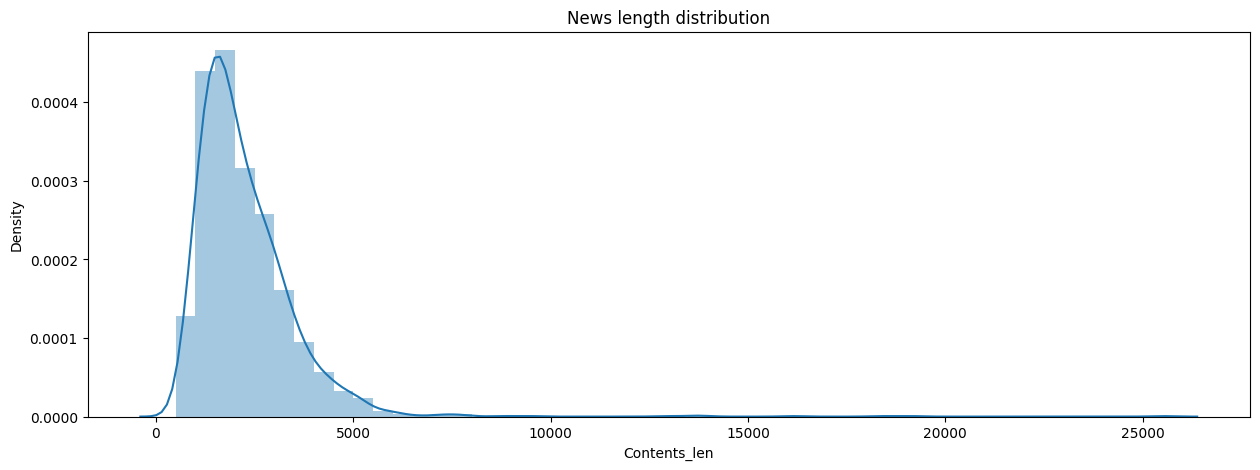

In [35]:
plt.figure(figsize=(15, 5))
sns.distplot(df['Contents_len']).set_title('News length distribution');

**We can see here that most of the contents length lie between 0-5000 but a few goes as high as 25000.**

### What all manipulations have you done and insights you found?

None

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

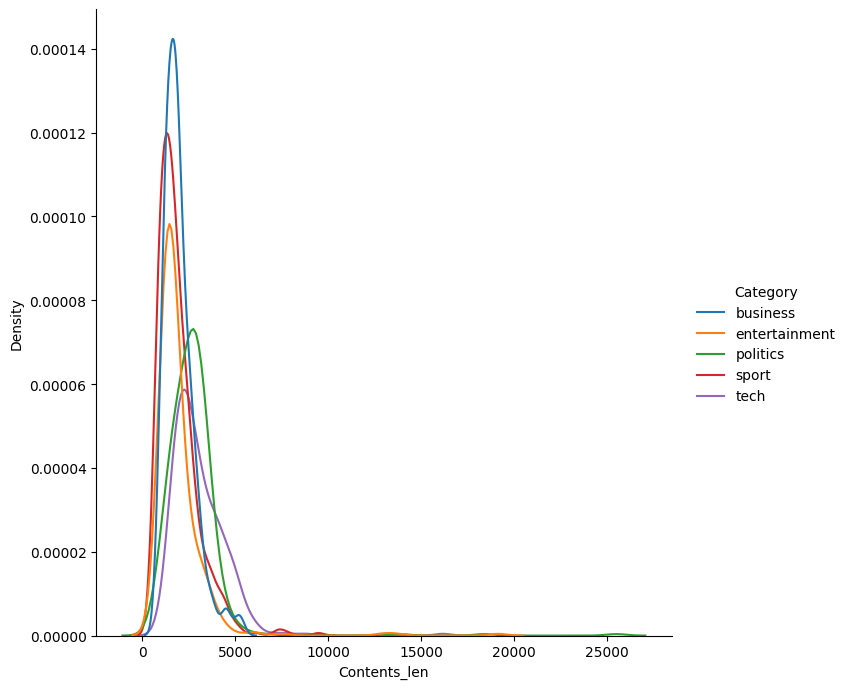

In [36]:
# Chart - 1 visualization code
#Dist plot for each category
sns.displot(df, x="Contents_len", hue="Category", kind="kde",height=7,aspect =1 )

**Here we can see the content length distribution for each categories.**

In [37]:
df

,Filename,Contents,Category,Contents_len
0,467,european losses hit gm's profits general moto...,business,1231
1,466,high fuel costs hit us airlines two of the la...,business,1837
2,475,watchdog probes vivendi bond sale french stoc...,business,1795
3,488,us budget deficit to reach $368bn the us budg...,business,1885
4,470,saudi investor picks up the savoy london's fa...,business,864
...,...,...,...,...
2215,036,microsoft seeking spyware trojan microsoft is...,tech,1330
2216,006,wi-fi web reaches farmers in peru a network o...,tech,3931
2217,001,ink helps drive democracy in asia the kyrgyz ...,tech,4044
2219,024,game firm holds 'cast' auditions video game f...,tech,1602


In [38]:
#Checking the number of Article per categories:
cat_count =df.groupby(['Category'],)['Category'].count()


Text(0.5, 1.0, 'Count per Category')

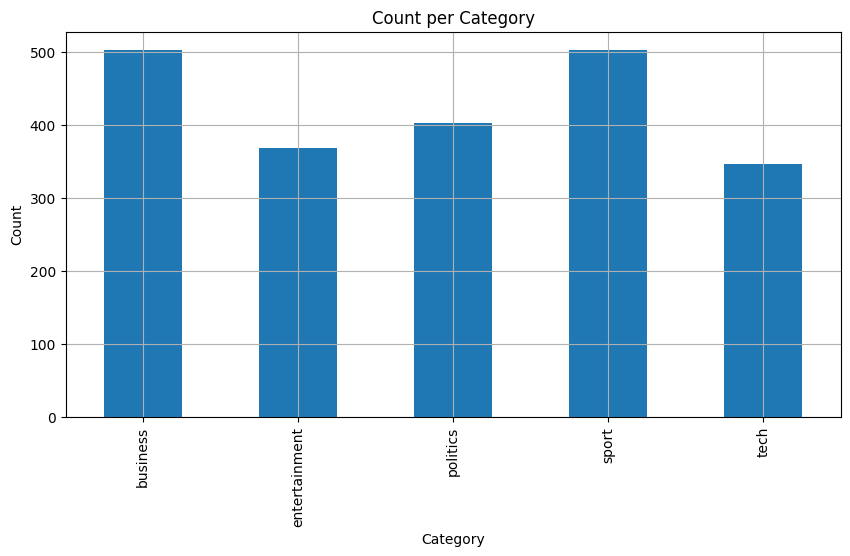

In [39]:
plt.figure(figsize=(10,5))
cat_count.plot(kind ='bar', grid =True)
plt.ylabel("Count")
plt.title("Count per Category")

##### 1. Why did you pick the specific chart?

**Bar chart gives us an apt idea about the number of articles in each category**

##### 2. What is/are the insight(s) found from the chart?

**We can see here the highest number of content is for the business and the spors category.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

**No missing values hence not needed**

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Not needed**

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Not needed**

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Let's Check the textual content of the Data:

In [40]:
content = df.reset_index()
content = content['Contents']
content

0       european losses hit gm's profits  general moto...
1       high fuel costs hit us airlines  two of the la...
2       watchdog probes vivendi bond sale  french stoc...
3       us budget deficit to reach $368bn  the us budg...
4       saudi investor picks up the savoy  london's fa...
                              ...                        
2120    microsoft seeking spyware trojan  microsoft is...
2121    wi-fi web reaches farmers in peru  a network o...
2122    ink helps drive democracy in asia  the kyrgyz ...
2123    game firm holds 'cast' auditions  video game f...
2124    warnings about junk mail deluge  the amount of...
Name: Contents, Length: 2125, dtype: object

#### 2. Lower Casing

In [59]:
# Lower Casing
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#### 3. Removing Punctuations

In [60]:
# Remove Punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [61]:
df['Contents'] = df['Contents'].apply(remove_punctuation)
df.head(10)

,Filename,Contents,Category,Contents_len
0,467,european losses hit gms profits general motor...,business,1231
1,466,high fuel costs hit us airlines two of the la...,business,1837
2,475,watchdog probes vivendi bond sale french stoc...,business,1795
3,488,us budget deficit to reach 368bn the us budge...,business,1885
4,470,saudi investor picks up the savoy londons fam...,business,864
5,501,water firm suez in argentina row a conflict b...,business,3459
6,486,indias reliance family feud heats up the ongo...,business,1820
7,509,euro firms miss out on optimism more than 90 ...,business,2618
8,458,parmalat founder offers apology the founder a...,business,2172
9,448,us ahold suppliers face charges us prosecutor...,business,2433


#### 4. Removing URLs & Removing words and digits contain digits.

In [62]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_urls(text):
    # Regular expression pattern to match URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

    # Replace URLs with an empty string
    cleaned_text = re.sub(url_pattern, '', text)

    return cleaned_text

df['Contents']=df['Contents'].apply(remove_urls)



#### 5. Tokenization

**CountVectorizer(Top Words):**

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called **Tokenization.**

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called **Feature Extraction (or Vectorization)**.

In [50]:
# Tokenization
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])


# **6.Stopword removal**

In [51]:
# Remove Stopwords
# dowloading nltk stopwords module
nltk.download('stopwords')
# extracting all stopwords for english language
stop = nltk.corpus.stopwords.words('english')
stop[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

## **7.Vectorization**

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


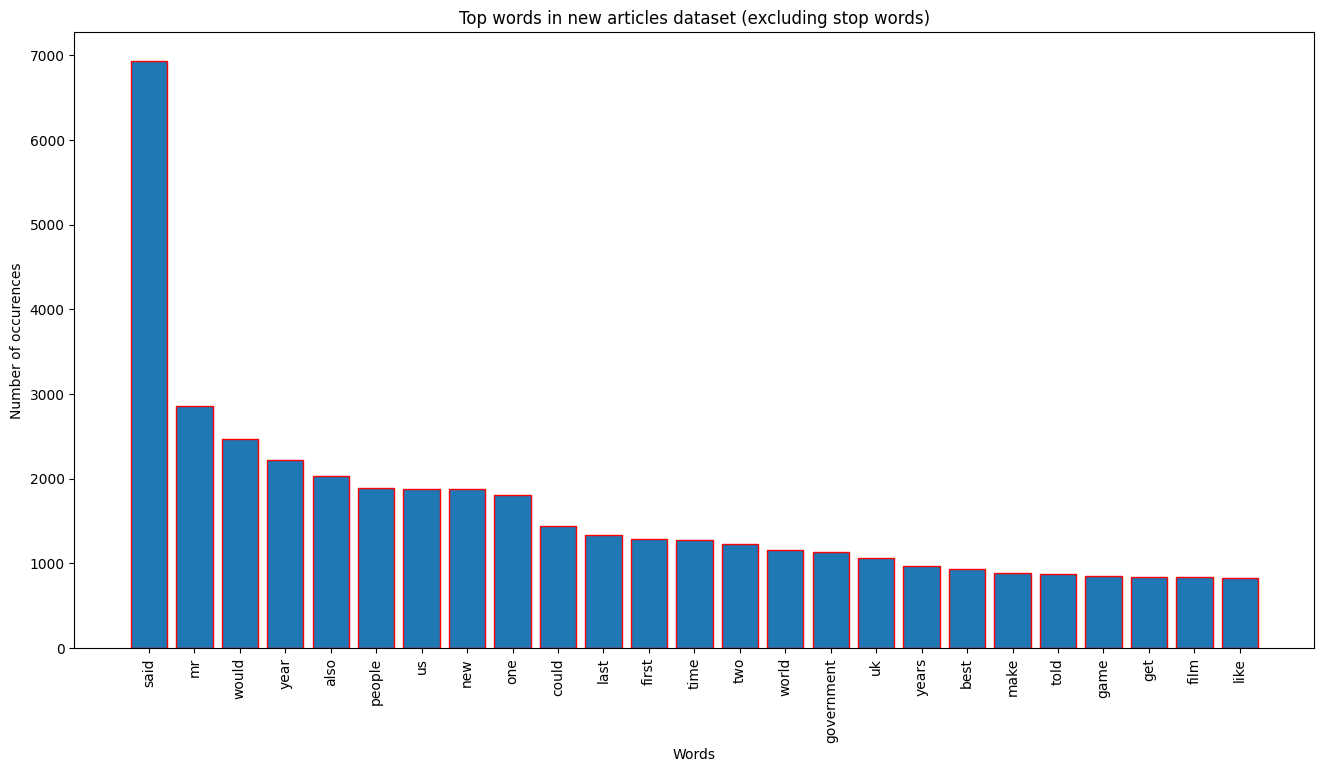

In [52]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stop)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer,
                                     text_data=content)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, edgecolor='red')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
plt.show()

## **8. Text Normalization**

**STEMMING AND LEMMATIZING THE DATA**

**Stemming**: is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization**: This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [53]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# making a lemmatizer object
sno = nltk.stem.SnowballStemmer('english')


# lemmatizing an article to see what snowball lemmatizer returns
for rows in content:
 print(rows)
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 break


european losses hit gm's profits  general motors (gm) saw its net profits fall 37% in the last quarter of 2004, as it continued to be hit by losses at its european operations.  the us giant earned $630m (£481.5m) in the october-to-december period, down from $1bn in the fourth quarter of 2003. gm's revenues rose 4.7% to $51.2bn from $48.8bn a year earlier. the fourth-quarter losses at general motors europe totalled $345m, up from $66m during the same period in 2003. gm's main european brands are opel and vauxhall.  excluding special items, gm's global income from continuing operations totalled $569m during the quarter, down from $838m a year earlier. the results were in line with wall street expectations and shares in gm rose by about 1% in pre-market trade. for the whole of 2004, gm earned $3.7bn, down from $3.8bn in 2003, while its annual revenue rose 4.5% to $193bn. gm said its profits were also hit by higher healthcare costs in the us. "gm reported solid overall results in 2004, des

**As we use a Lemmatization technique we can see that it has worked but some words dont make any sense now such as 'associated' is 'associ' and 'aggregate' to 'aggreg'.Hence the meaning of the words are lost in the process so we wont be using this method.**

#### 10. Text Vectorization

**Vectorization is a technique that converts the text content to numerical feature vectors. Bag of Words takes a document from a corpus and converts it into a numeric vector by mapping each document word to a feature vector for the machine learning model.**

In [54]:
# Vectorizing Text
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stop, max_features = 4000)

# text before vectorization
text_sample = content
print('Content after removing Stopwords and Punctuations: \n{}'.format(text_sample[23]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Vectorization: \n{}'.format(document_term_matrix[23]))



Content after removing Stopwords and Punctuations: 
uk economy ends year with spurt  the uk economy grew by an estimated 3.1% in 2004 after accelerating in the last quarter of the year, says the office for national statistics (ons).  the figure is in line with treasury and bank of england forecasts. the ons says gross domestic product (gdp) rose by a strong 0.7% in the three months to 31 december, compared with 0.5% in the previous quarter. the rise came despite a further decline in production output and the worst christmas for retailers in decades.  the annual figure marked out the best year since 2000, and was also well ahead of the 2.2% recorded in 2003. growth in the final three months of 2004 marked the 50th consecutive quarter of expansion. "on the basis of the latest information the uk has entered 2005 on course to continue its record period of growth," said paul boateng, chief secretary to the treasury in a statement.  the ons said the services sector, which accounts for nearly

##### Which text vectorization technique have you used and why?

Answer Here.

## ***7. ML Model Implementation***

# **Model - Latent Semantic Analysis (LSA):**

**Latent Semantic Analysis (LSA)** is a method that allows us to extract topics from documents by converting their text into word-topic and document-topic matrices. The procedure for LSA is relatively straightforward: Convert the text corpus into a document-term matrix. Implement truncated singular value decomposition.

In [63]:
from sklearn.decomposition import TruncatedSVD


In [64]:
# ML Model - 1 Implementation

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=23)
# Fit the Algorithm
svd_model.fit(document_term_matrix)
# Predict on the model

TruncatedSVD(n_components=5, n_iter=100, random_state=23)

In [65]:

terms = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:40]
    print(" ")
    print("Topic "+str(i)+": ")
    print(" ")
    for t in sorted_terms:
        print(t[0])

 
Topic 0: 
 
said
mr
would
people
new
also
one
year
us
could
government
time
last
years
first
uk
music
like
two
world
labour
get
best
make
told
many
party
blair
way
think
bbc
game
election
well
made
next
good
back
take
much
 
Topic 1: 
 
best
music
song
years
25
last
game
angels
one
awards
like
year
robbie
think
first
urban
time
good
film
award
games
people
british
win
really
well
world
us
williams
songs
tv
play
great
even
stone
mobile
two
band
prize
album
 
Topic 2: 
 
mr
best
song
music
labour
blair
party
election
years
angels
25
brown
british
robbie
government
think
awards
urban
howard
minister
prime
kilroy
public
britain
silk
chancellor
award
songs
ukip
good
tory
leader
voted
last
forsyth
stone
tax
like
joss
tories
 
Topic 3: 
 
game
time
first
games
england
mr
one
new
roddick
wales
back
two
world
ireland
play
side
labour
nadal
party
half
win
election
playing
zealand
team
kilroy
set
match
cup
players
blair
rugby
six
get
silk
final
brown
point
ukip
break
 
Topic 4: 
 
people
music


As we can see from above the LSA model does group the words into topics but the words are heavily mismatched for just 40 words,for example:



1.   Topic 0 has definded 'music' , 'government' and 'game' in the same cluster

1.  Topic 1 has definded 'songs' and 'mobile' in the same cluster

2.  Topic 2 has definded 'labour' and 'party' in the same cluster

2.   Topic 3 has definded 'nadal' and 'election' in the same cluster

1.  Topic 4 is comparatively clustered better because most of the words belongs to technology but even so there are words like 'government' , 'wage' , 'urban' which are not accurate.


# ***Since the LSA model performs very poorly we won't be using this as our clustering algorithm.***






#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_20newsgroups



# Create an LDA model
lda = LatentDirichletAllocation()

# Define hyperparameter grid for tuning
param_grid = {
    'n_components': [5, 10, 15],          # Number of topics
    'learning_method': ['online', 'batch'],  # Learning method
    'learning_decay': [0.5, 0.7, 0.9]        # Learning rate decay
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(lda, param_grid, cv=5, verbose=2)

# Fit the grid search to the data
grid_search.fit(document_term_matrix)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Log Likelihood Score:", grid_search.best_score_)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END learning_decay=0.5, learning_method=online, n_components=5; total time=  10.8s
[CV] END learning_decay=0.5, learning_method=online, n_components=5; total time=   8.3s
[CV] END learning_decay=0.5, learning_method=online, n_components=5; total time=   8.3s
[CV] END learning_decay=0.5, learning_method=online, n_components=5; total time=   7.7s
[CV] END learning_decay=0.5, learning_method=online, n_components=5; total time=   8.9s
[CV] END learning_decay=0.5, learning_method=online, n_components=10; total time=   7.1s
[CV] END learning_decay=0.5, learning_method=online, n_components=10; total time=   9.5s
[CV] END learning_decay=0.5, learning_method=online, n_components=10; total time=   6.9s
[CV] END learning_decay=0.5, learning_method=online, n_components=10; total time=   9.2s
[CV] END learning_decay=0.5, learning_method=online, n_components=10; total time=   8.3s
[CV] END learning_decay=0.5, learning_method=online, n

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

# **Model -Latent Dirichlet Allocation (LDA):**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Latent Dirichlet Allocation (LDA)** algorithm is an unsupervised learning algorithm that attempts to describe a set of observations as a mixture of distinct categories. LDA is most commonly used to discover a user-specified number of topics shared by documents within a text corpus.

An advantage of the LDA technique is that one does not have to know in advance what the topics will look like. By tuning the LDA parameters to fit different dataset shapes, one can explore topic formation and resulting document clusters.

The goal of LDA is to map all the documents to the topics in a way, such that the words in each document are mostly captured by those imaginary topics.


> We will be using pyLDAvis which allows a better visualization.

>We will be using T-Sne for lowering down the dimensions of our feature-space

In [ ]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***